In [1]:
%%html

<h1>Feature Selection</h1>

<br>

<h1>Capstone Project - Predicting Car Accident Severity</h1>

<br>
<h2>Applied DSc Capstone by IBM/Coursera</h2>
<br>
<br>


In [2]:
%%html

<h1> I - Data processing </h1>

<h2> a - Imports </h2>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [4]:
pwd

'C:\\Users\\Hp\\Desktop\\project'

In [5]:

df = pd.read_csv(r"C:\Users\Hp\Desktop\project\178_Data-Collisions.csv")
df.info()

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
%%html
<h1> B - Removing all irrelivant features such as ID and Discription </h1>

In [7]:

df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
%%html
<h1>C- Finding Missing value </h1>

In [9]:

def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

C

In [10]:
%%html
<h1> D - Handling Missing value </h1>

In [11]:

df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns with more than 20% values missing (INATTENTIONIND,PEDROWNOTGRNT,SPEEDING)
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with less than 20% values missing (X, Y,COLLISIONTYPE,JUNCTIONTYPE,
                                                            #UNDERINFL,WEATHER,ROADCOND,LIGHTCOND)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    143747 non-null  int64  
 1   X               143747 non-null  float64
 2   Y               143747 non-null  float64
 3   ADDRTYPE        143747 non-null  object 
 4   SEVERITYCODE.1  143747 non-null  int64  
 5   COLLISIONTYPE   143747 non-null  object 
 6   PERSONCOUNT     143747 non-null  int64  
 7   PEDCOUNT        143747 non-null  int64  
 8   PEDCYLCOUNT     143747 non-null  int64  
 9   VEHCOUNT        143747 non-null  int64  
 10  JUNCTIONTYPE    143747 non-null  object 
 11  UNDERINFL       143747 non-null  object 
 12  WEATHER         143747 non-null  object 
 13  ROADCOND        143747 non-null  object 
 14  LIGHTCOND       143747 non-null  object 
 15  HITPARKEDCAR    143747 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 18.6+ M

In [12]:
df['SEVERITYCODE'].value_counts()

1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

In [13]:
%%html
<h1> E - Creating a Balanced data set </h1>

In [14]:
#shuffling and creating a balanced dataset
df= df.sample(frac=1,random_state=0,replace=False)

# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = df.loc[df['SEVERITYCODE'] == 2]

# 2 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

# 3 - concatenating datasets to get balanced dataset
df_balanced = pd.concat([df_scode1,df_scode2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
print(df_balanced.info())
print(df_balanced['SEVERITYCODE'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEVERITYCODE    97852 non-null  int64  
 1   X               97852 non-null  float64
 2   Y               97852 non-null  float64
 3   ADDRTYPE        97852 non-null  object 
 4   SEVERITYCODE.1  97852 non-null  int64  
 5   COLLISIONTYPE   97852 non-null  object 
 6   PERSONCOUNT     97852 non-null  int64  
 7   PEDCOUNT        97852 non-null  int64  
 8   PEDCYLCOUNT     97852 non-null  int64  
 9   VEHCOUNT        97852 non-null  int64  
 10  JUNCTIONTYPE    97852 non-null  object 
 11  UNDERINFL       97852 non-null  object 
 12  WEATHER         97852 non-null  object 
 13  ROADCOND        97852 non-null  object 
 14  LIGHTCOND       97852 non-null  object 
 15  HITPARKEDCAR    97852 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 12.7+ MB
None
2    489

In [15]:
%%html

<h1> f - Encoding Categorical Columns and performing Train Test Split of dataset </h1>

In [16]:
X = df_balanced.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
X = pd.get_dummies(data=X, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

Y = df_balanced[['SEVERITYCODE']]
print(X.info())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   X                                                               97852 non-null  float64
 1   Y                                                               97852 non-null  float64
 2   SEVERITYCODE.1                                                  97852 non-null  int64  
 3   PERSONCOUNT                                                     97852 non-null  int64  
 4   PEDCOUNT                                                        97852 non-null  int64  
 5   PEDCYLCOUNT                                                     97852 non-null  int64  
 6   VEHCOUNT                                                        97852 non-null  int64  
 7   ADDRTYPE_Block                              

In [17]:
%%html

<h1> 
g - Normalizing/Feature Scaling </h1>

In [18]:

#Scaling training data as per the requirements
scaler = StandardScaler()
X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

X_train.info()

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 157089 to 61252
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   X                                                               78281 non-null  float64
 1   Y                                                               78281 non-null  float64
 2   SEVERITYCODE.1                                                  78281 non-null  int64  
 3   PERSONCOUNT                                                     78281 non-null  float64
 4   PEDCOUNT                                                        78281 non-null  float64
 5   PEDCYLCOUNT                                                     78281 non-null  float64
 6   VEHCOUNT                                                        78281 non-null  float64
 7   ADDRTYPE_Block                              

In [19]:
%%html

<h1> 
h - Plotting  data by corelation heat Map </h1>

In [20]:
df_corr = pd.concat([Y_train,X_train])
df_corr = df_corr.corr()
#df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

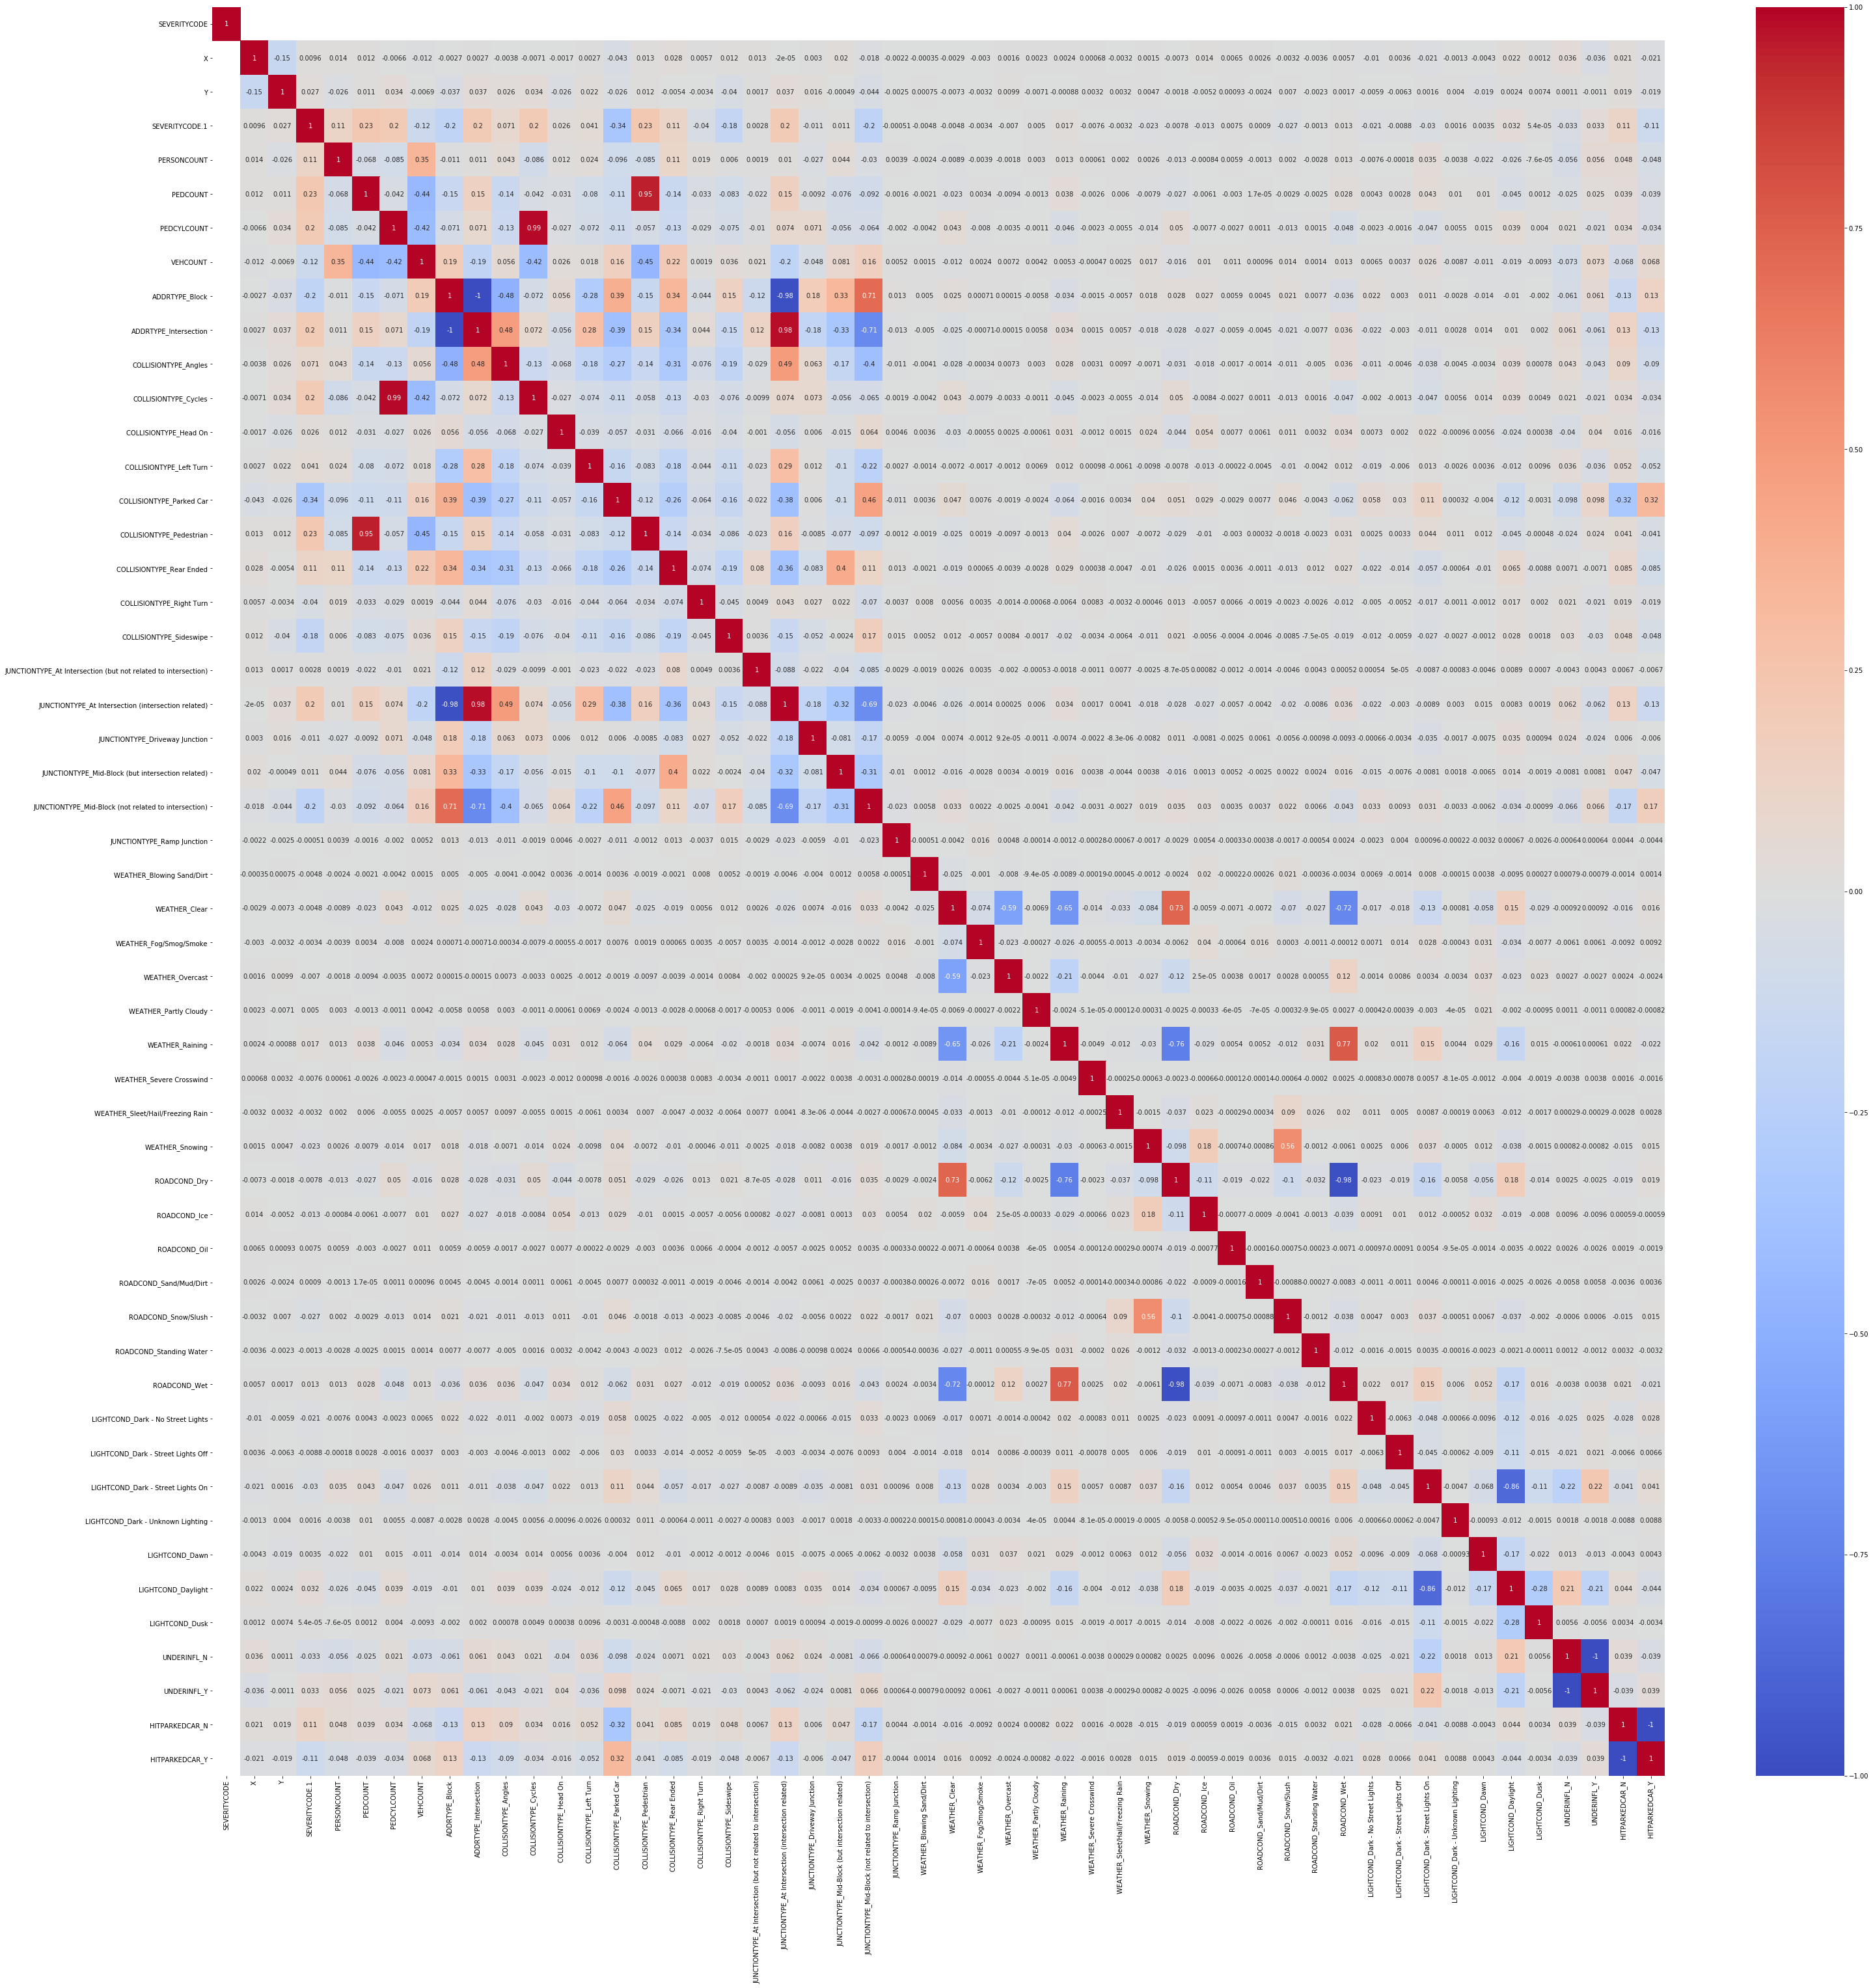

In [21]:
plt.figure(figsize=(50,50))
seaborn.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('corr.png')
#seaborn.pairplot(df_normalized)

In [22]:

missing_function(X_train)
print(X_train.info())
print(X_test.info())

X
False    78281
Name: X, dtype: int64
 0.075985    131
-0.079468    107
 1.058683    106
-0.072604    105
-0.495493    103
            ... 
 0.603848      1
 0.088378      1
 0.997306      1
-1.518400      1
-2.362298      1
Name: X, Length: 15925, dtype: int64

Y
False    78281
Name: Y, dtype: int64
-0.283441    131
 1.563351    107
-0.716233    106
-0.228562    105
 1.713907    103
            ... 
 0.291630      1
-0.002117      1
 0.165713      1
-0.684903      1
-0.108677      1
Name: Y, Length: 16080, dtype: int64

SEVERITYCODE.1
False    78281
Name: SEVERITYCODE.1, dtype: int64
2    39202
1    39079
Name: SEVERITYCODE.1, dtype: int64

PERSONCOUNT
False    78281
Name: PERSONCOUNT, dtype: int64
-0.473010     44180
 0.237612     17490
 0.948235      7564
 1.658857      3531
-1.894254      2484
 2.369479      1495
 3.080101       624
-1.183632       302
 3.790724       295
 4.501346       134
 5.211968        66
 5.922590        29
 6.633213        15
 7.343835        12
 10.186324

In [23]:
%%html

<h1> 
II - Applying Classification ML Algorithms¶ </h1>
<br>
<h2>a - Logistic Regression</h2>

In [25]:
#Fitting and Predictions
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)

#Confusion Matrix
lr_cm = confusion_matrix(Y_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(Y_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



In [27]:
%%html

<h2>
c - Naive Bayes</h2>

In [28]:
#Fitting and Predictions
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_predictions = nb.predict(X_test)

#Confusion Matrix
nb_cm=confusion_matrix(Y_test,nb_predictions)
print(nb_cm,'\n')

#Classification Report
nb_cr = classification_report(Y_test,nb_predictions)
print(nb_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,nb_predictions)
print(acc,'\n')
accDict['NB'] = acc

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



In [29]:
%%html

<h2>
C - Decesion Tree Classifier</h2>

In [30]:

#Fitting and Predictions
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(X_train,Y_train)
dtc_predictions = dtc1.predict(X_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(Y_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(Y_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

Best Hyperparameter DTC :  {'criterion': 'gini', 'random_state': 0}
[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



In [31]:
%%html

<h2>
D - Random Forest Classifer </h2>

In [32]:
#Fitting and Predictions
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(X_train,Y_train)
rf_predictions = rf1.predict(X_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(Y_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed whe

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameter RFT :  {'criterion': 'gini', 'n_estimators': 50, 'random_state': 0}
[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



In [33]:
%%html

<h2>
E - SVM </h2>

In [34]:
#Fitting and Predictions
svc = SVC()
params = {'kernel':['linear','rbf'], 
          'random_state':[0]}
svc1 = GridSearchCV(svc, param_grid=params)
svc1.fit(X_train,Y_train)
svc_predictions = svc1.predict(X_test)
print('Best Hyperparameter SVM : ',svc1.best_params_)

#Confusion Matrix
svc_cm=confusion_matrix(Y_test,svc_predictions)
print(svc_cm,'\n')

#Classification Report
svc_cr = classification_report(Y_test,svc_predictions)
print(svc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,svc_predictions)
print(acc,'\n')
accDict['SVC'] = acc

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Best Hyperparameter SVM :  {'kernel': 'linear', 'random_state': 0}
[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



In [38]:
%%html

<h2>
III --  Plotting_result </h2>

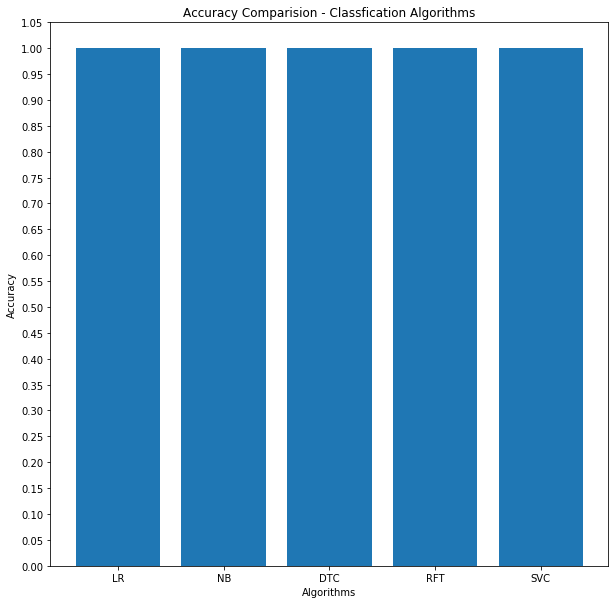

In [39]:
accDict = sorted(accDict.items(), key=lambda x: x[1], reverse=True)
dict1 = {}
for elem in accDict:
    dict1[elem[0]] = elem[1]
Algorithms = dict1.keys()
Accuracy = dict1.values()
plt.figure(figsize=(10,10))
plt.bar(Algorithms, Accuracy)
plt.xlabel('Algorithms')
plt.yticks(np.arange(0,max(Accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision - Classfication Algorithms')
plt.show()

In [41]:
%%html

<CENTER><h2>
END </h2>